In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
data = pd.read_csv("Data/DataPreparation.csv")
data

,Date,Open,High,Low,Close,Volume,Stocks
0,2005-07-25,1.322084,1.330800,1.314270,1.316674,294627200,AAPL
1,2005-07-26,1.322685,1.325690,1.303149,1.311264,268592800,AAPL
2,2005-07-27,1.317275,1.324488,1.282412,1.322083,283749200,AAPL
3,2005-07-28,1.317876,1.322385,1.301347,1.316374,251311200,AAPL
4,2005-07-29,1.309160,1.333805,1.270090,1.281811,562080400,AAPL
...,...,...,...,...,...,...,...
25135,2025-07-14,156.869995,157.470001,155.520004,156.820007,10185600,JNJ
25136,2025-07-15,156.360001,157.190002,154.800003,155.169998,6873200,JNJ
25137,2025-07-16,160.300003,166.119995,159.800003,164.779999,22134800,JNJ
25138,2025-07-17,163.179993,164.699997,162.300003,162.979996,11295700,JNJ


In [3]:
data.isnull().sum() #Checking Null

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
Stocks    0
dtype: int64

In [4]:
data.duplicated().sum()#No Duplication

np.int64(0)

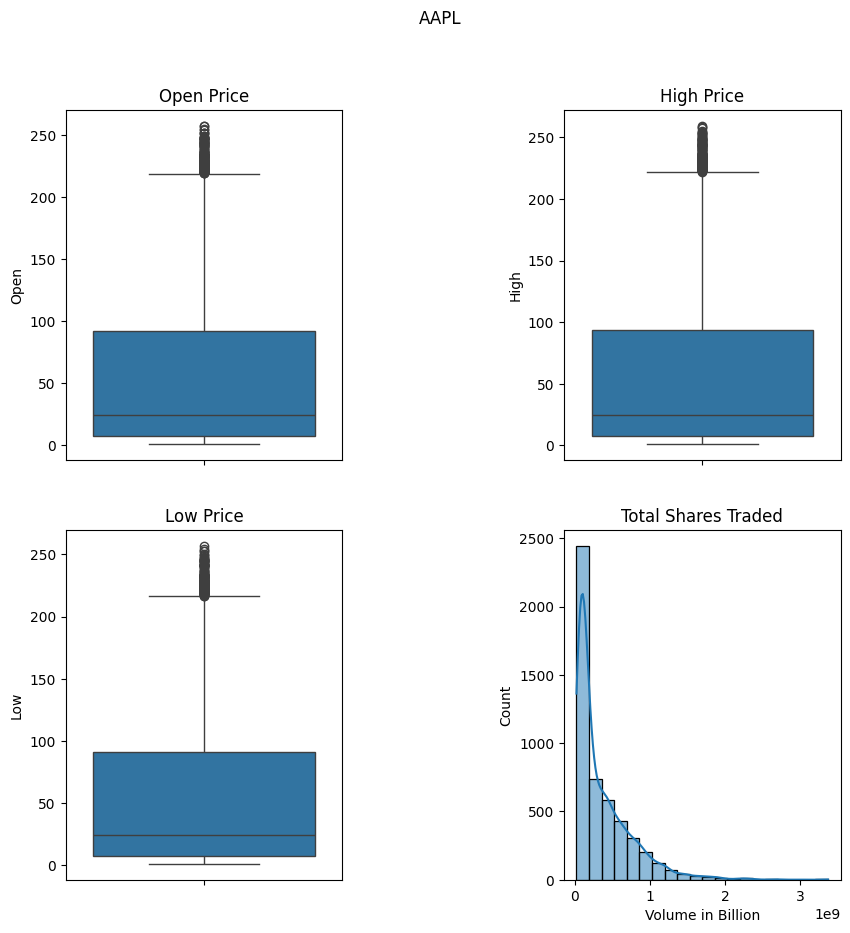

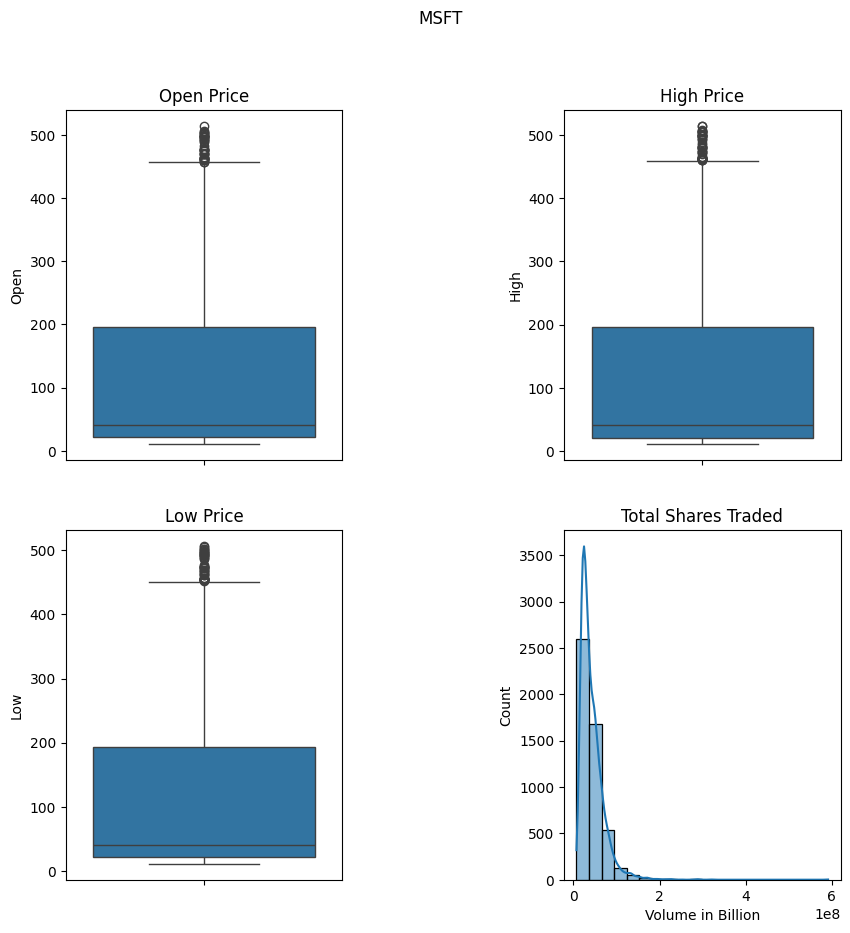

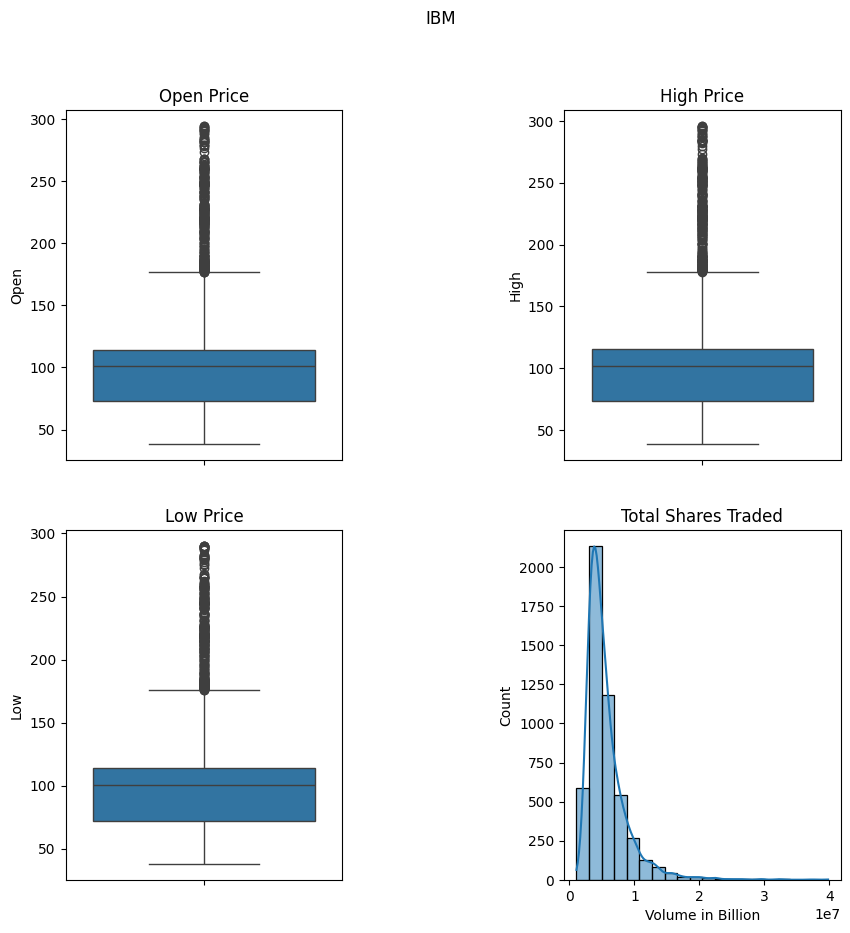

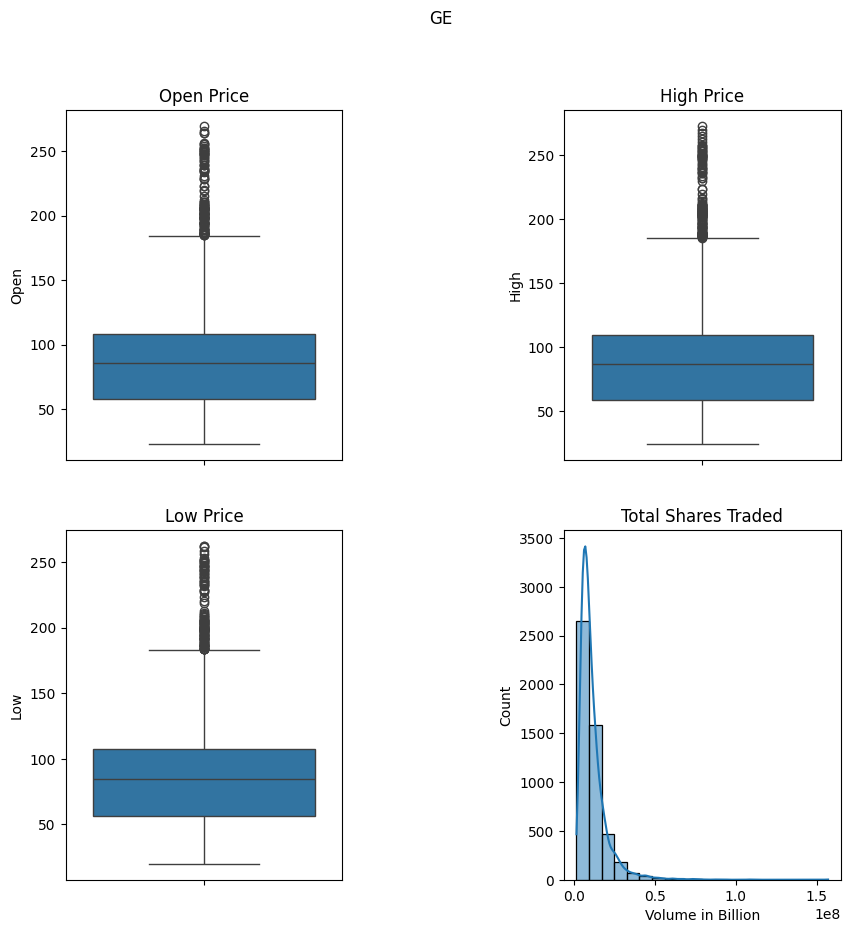

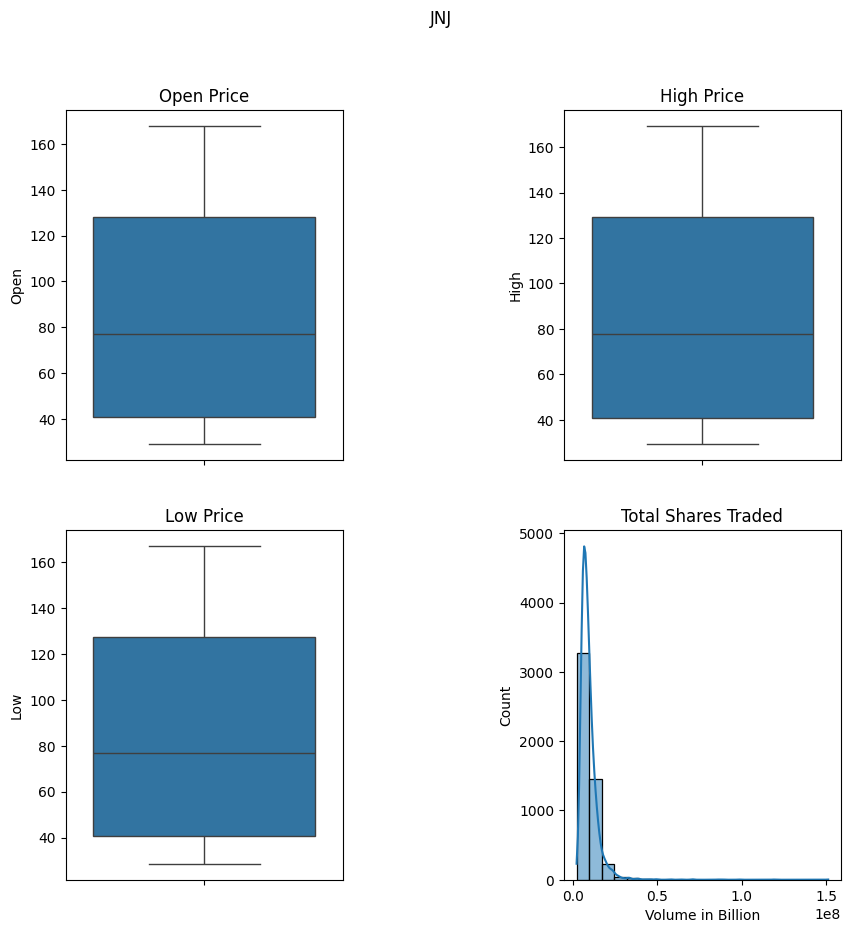

In [5]:
#Outliers Detection per stocks
for stocks in data["Stocks"].unique():
    fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(10,10))
    fig.suptitle(f"{stocks}")
    plt.subplots_adjust(wspace=0.8)
    df = data[data["Stocks"]==stocks]
    sns.boxplot(df["Open"],ax=ax[0,0])
    sns.boxplot(df["High"],ax=ax[0,1])
    sns.boxplot(df["Low"],ax=ax[1,0])
    sns.histplot(df["Volume"],ax=ax[1,1],bins=20,kde=True)
    ax[0,0].set_title("Open Price")
    ax[0,1].set_title("High Price")
    ax[1,0].set_title("Low Price")
    ax[1,1].set_title("Total Shares Traded")
    ax[1,1].set_xlabel("Volume in Billion")
    # plt.savefig(f"Visuals/{stocks}_OutlierDetection",dpi=100)

In [6]:
data.describe()

,Open,High,Low,Close,Volume
count,25140.000000,25140.000000,25140.000000,25140.000000,2.514000e+04
mean,89.290949,90.104376,88.480956,89.323317,8.692885e+07
std,75.029764,75.719304,74.352249,75.084675,2.214620e+08
min,1.277002,1.292330,1.262877,1.281811,1.074765e+06
25%,37.375915,37.673882,37.033957,37.367706,6.286499e+06
50%,74.086032,74.695392,73.462415,74.118134,1.249230e+07
75%,116.061459,116.837167,115.113299,115.977423,4.989190e+07
max,514.479980,514.640015,507.429993,511.700012,3.372970e+09


In [7]:
#Renaming Stocks Names
stocks = list()
for i,j in enumerate(data["Stocks"]):
    if j=="AAPL":
        data.loc[i,"Stocks"]="Apple"
    elif j=="MSFT":
        data.loc[i,"Stocks"]="Microsoft"
    elif j=="JNJ":
        data.loc[i,"Stocks"]="Johnson&Johnson"
    elif j=="GE":
        data.loc[i,"Stocks"]="GeneralElectric"
    else:
        pass       

In [8]:
data

,Date,Open,High,Low,Close,Volume,Stocks
0,2005-07-25,1.322084,1.330800,1.314270,1.316674,294627200,Apple
1,2005-07-26,1.322685,1.325690,1.303149,1.311264,268592800,Apple
2,2005-07-27,1.317275,1.324488,1.282412,1.322083,283749200,Apple
3,2005-07-28,1.317876,1.322385,1.301347,1.316374,251311200,Apple
4,2005-07-29,1.309160,1.333805,1.270090,1.281811,562080400,Apple
...,...,...,...,...,...,...,...
25135,2025-07-14,156.869995,157.470001,155.520004,156.820007,10185600,Johnson&Johnson
25136,2025-07-15,156.360001,157.190002,154.800003,155.169998,6873200,Johnson&Johnson
25137,2025-07-16,160.300003,166.119995,159.800003,164.779999,22134800,Johnson&Johnson
25138,2025-07-17,163.179993,164.699997,162.300003,162.979996,11295700,Johnson&Johnson


In [9]:
#Arranging DataSet
Data = pd.concat([data["Stocks"],data.iloc[:,[0,1,2,3,5]],data.iloc[:,[4]]],axis=1)
Data

,Stocks,Date,Open,High,Low,Volume,Close
0,Apple,2005-07-25,1.322084,1.330800,1.314270,294627200,1.316674
1,Apple,2005-07-26,1.322685,1.325690,1.303149,268592800,1.311264
2,Apple,2005-07-27,1.317275,1.324488,1.282412,283749200,1.322083
3,Apple,2005-07-28,1.317876,1.322385,1.301347,251311200,1.316374
4,Apple,2005-07-29,1.309160,1.333805,1.270090,562080400,1.281811
...,...,...,...,...,...,...,...
25135,Johnson&Johnson,2025-07-14,156.869995,157.470001,155.520004,10185600,156.820007
25136,Johnson&Johnson,2025-07-15,156.360001,157.190002,154.800003,6873200,155.169998
25137,Johnson&Johnson,2025-07-16,160.300003,166.119995,159.800003,22134800,164.779999
25138,Johnson&Johnson,2025-07-17,163.179993,164.699997,162.300003,11295700,162.979996


In [10]:
Data.corr(numeric_only=True)

,Open,High,Low,Volume,Close
Open,1.000000,0.999904,0.999904,-0.319617,0.999808
High,0.999904,1.000000,0.999860,-0.319186,0.999908
Low,0.999904,0.999860,1.000000,-0.320097,0.999905
Volume,-0.319617,-0.319186,-0.320097,1.000000,-0.319551
Close,0.999808,0.999908,0.999905,-0.319551,1.000000


In [14]:
Data["Date"] = pd.to_datetime(Data["Date"])

In [16]:
Data.to_csv("Data/Data-Validation.csv",index=False)

<h1><b>FINAL REPORT: DATA VALIDATION</b></h1>
<li>No Null Values Detected</li>
<li>No Duplicated Values</li>
<li>Outliers Detected in Features "open","high","low" and volume per Stocks however realistically possible in StockMarket-world applications and scenarios</li>
<li>Renamed Stocks Name but better convineince</li>
<li>Arranged Dataset for Separating Independent and Dependent Features</li>
<hr>
<b>Insights Gained:</b><br>
<b>AAPL</b>
<li>Potential Outliers in Apple StockMarket,shows right skewed graph for "High","Open","Low" i.e Values more than 200+</li>
<li>Volume shows extreme right skewed tail i.e Low Shares are  higher than 1 billion</li>
<b>MSFT</b>
<li>Potential Outliers in Microsoft StockMarket,shows right skewed graph for "High","Open","Low" i.e Values more than 450+</li>
<li>Volume shows extreme right skewed tail i.e Low Shares are traded higher than 50 Million </li>
<b>IBM</b>
<li>Extreme high Outliers in IBM StockMarket,shows an extreme right skewed range for "High","Open","Low" i.e Values more than 170+</li>
<li>Volume shows extreme right skewed tail i.e Low Shares are traded higher than 1 Million</li>
<b>GE</b>
<li>high Outliers in General Electric StockMarket similar to IBM,shows an extreme right skewed range for "High","Open","Low" i.e Values more than 170+</li>
<li>Volume shows extreme right skewed tail i.e Low Shares are traded higher than 30 Million</li>
<b>JNJ</b>
<li>No Potential Outliers Detected In JNJ</li>
<li>Volume shows extreme right skewed tail i.e Low Shares are traded higher than 20 Million</li>
<hr>
<li>Negative Correlation between Volume and other Features</li>
<li>Features are highly co-related</li>
